# 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [1]:
import pandas as pd 
import numpy as np
data=pd.read_csv("ToyotaCorolla - MLR.csv")
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [2]:
data.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [3]:
data.columns #give the column names

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [4]:
#checking for null values
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [5]:
#the above shows that there are no null values

In [6]:
#performing EDA

In [7]:
#identifing categorical data
data.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [8]:
#from the above we identified that Fuel_type is categorical

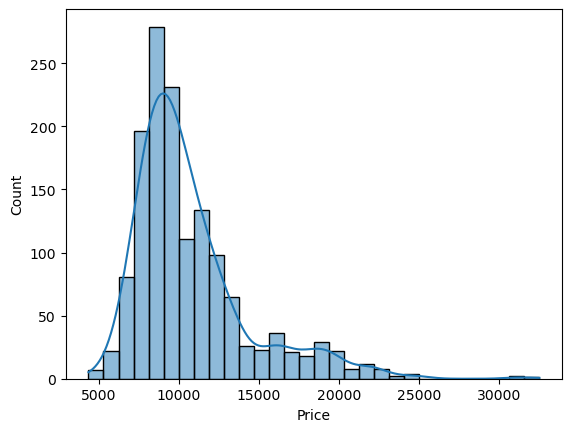

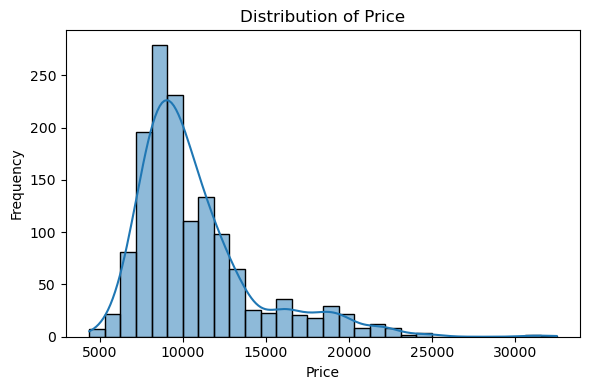

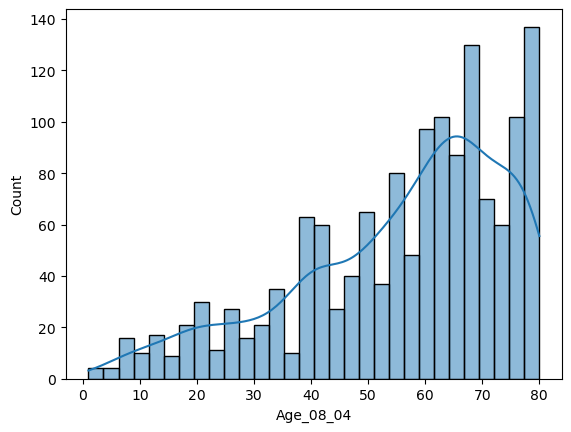

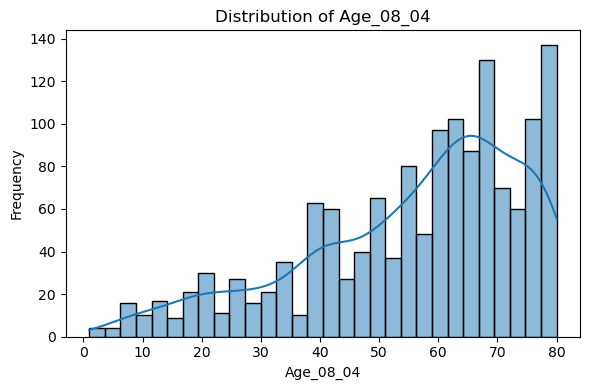

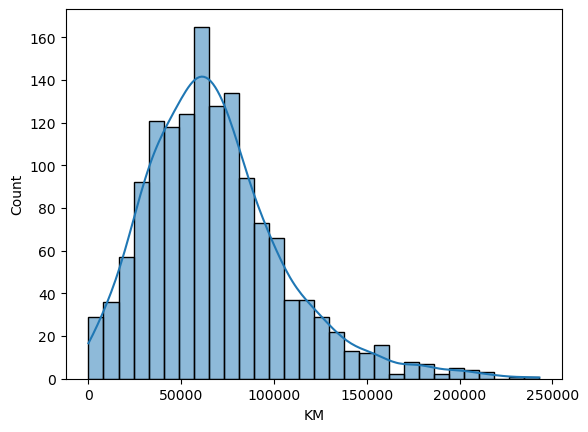

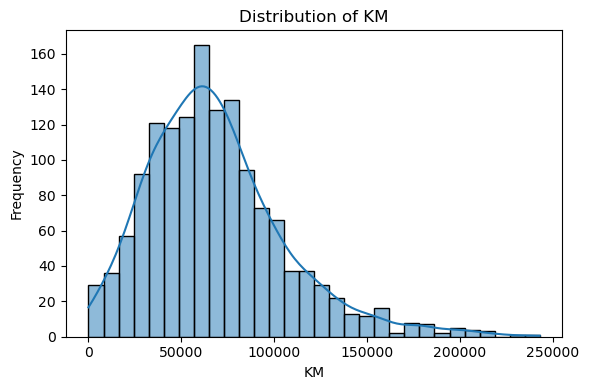

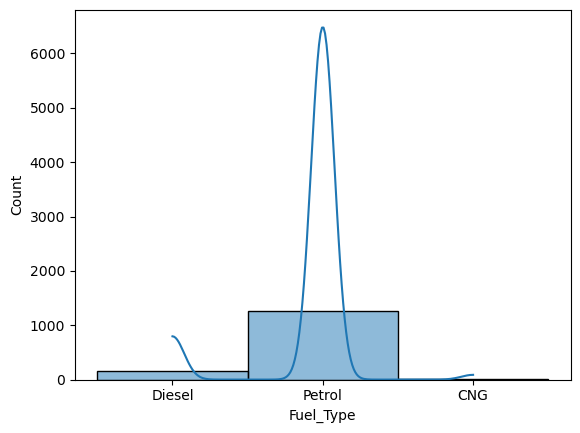

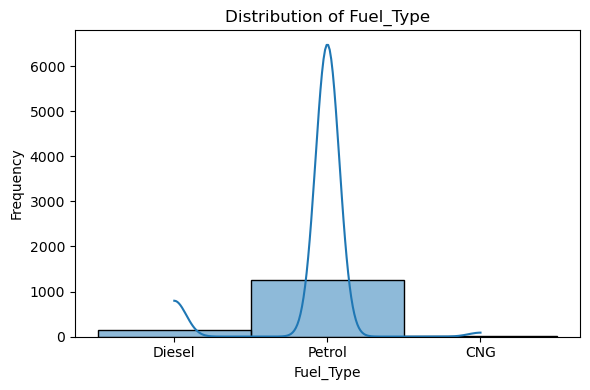

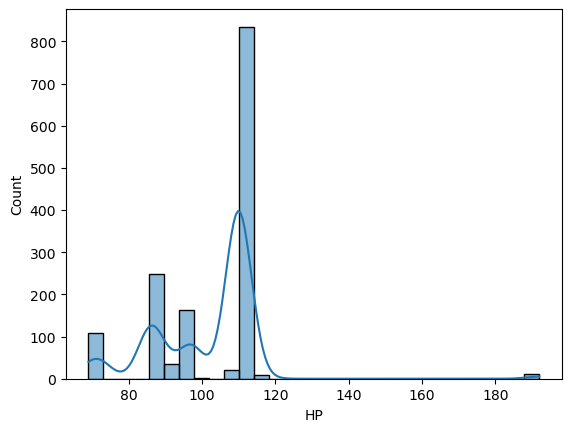

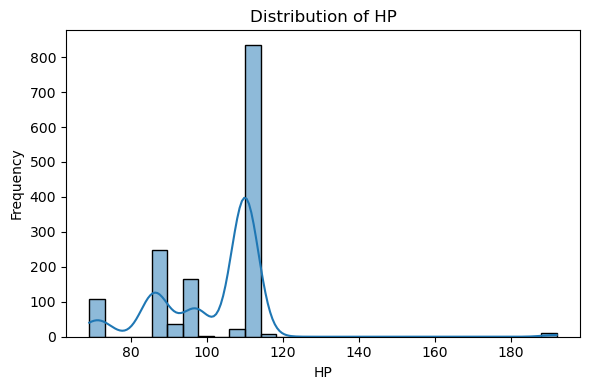

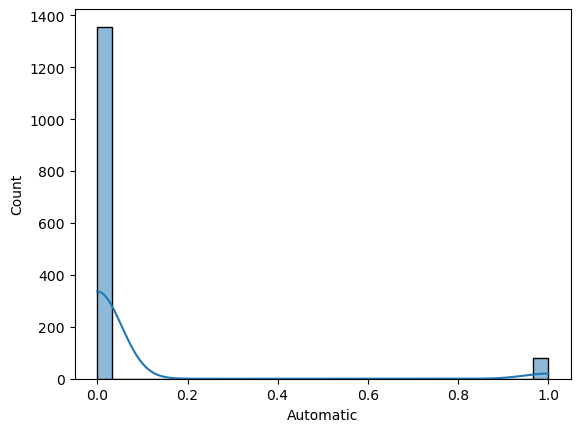

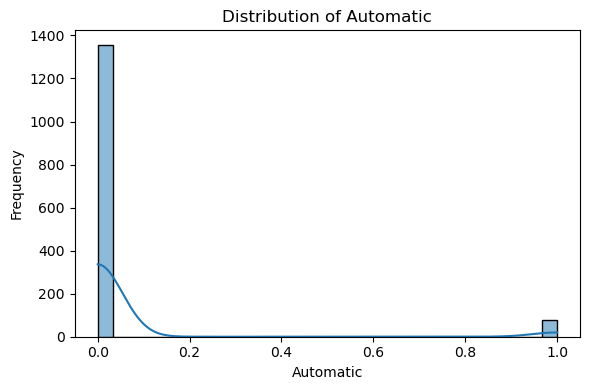

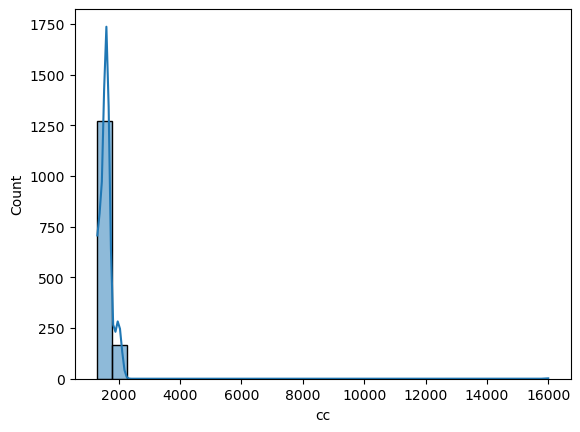

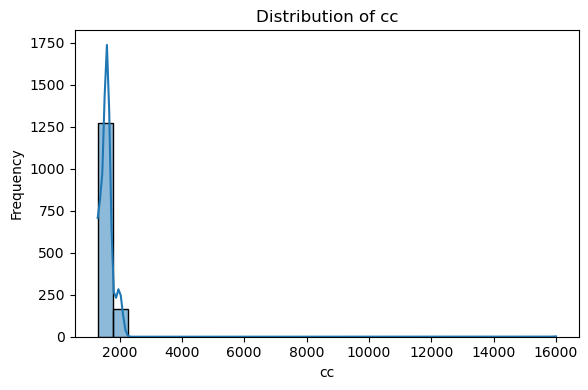

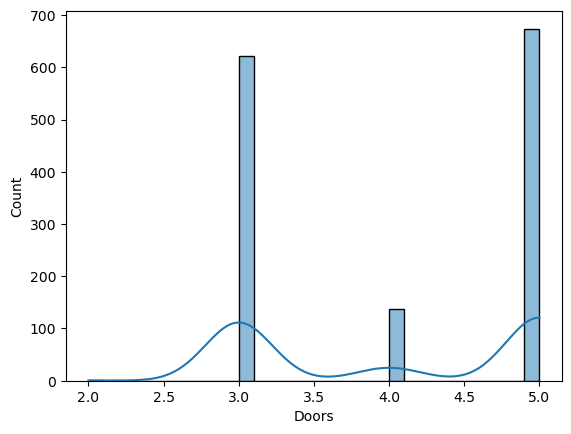

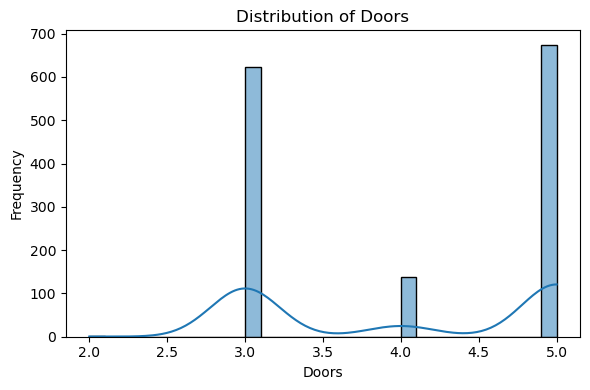

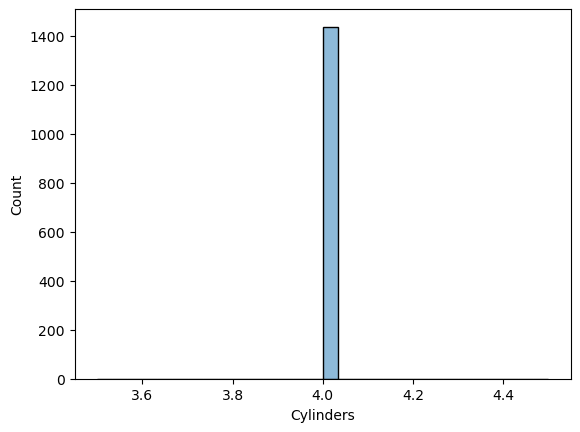

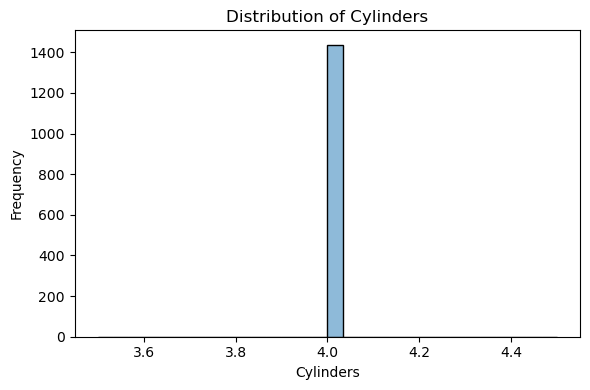

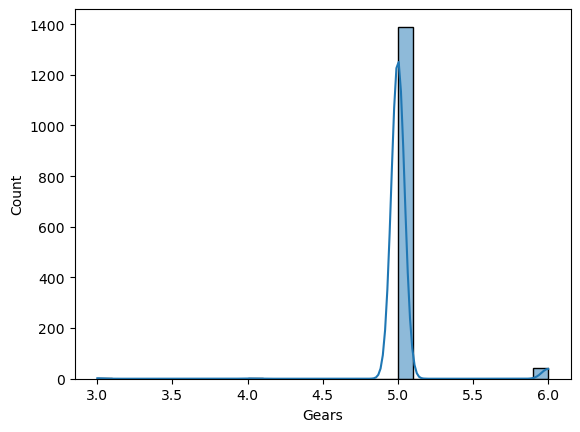

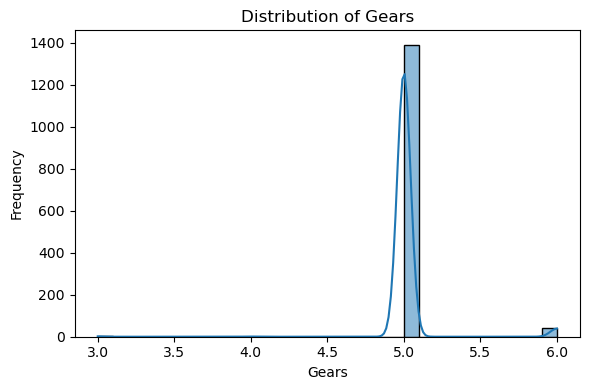

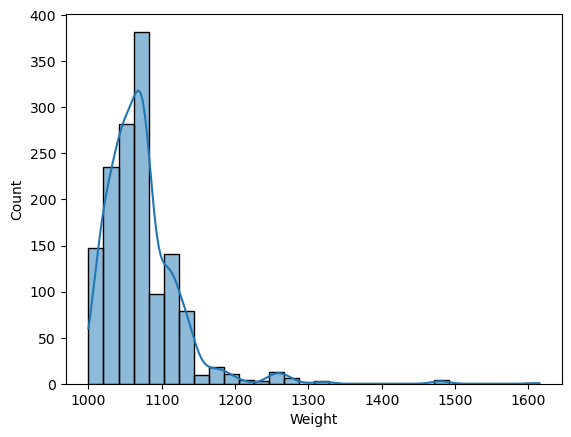

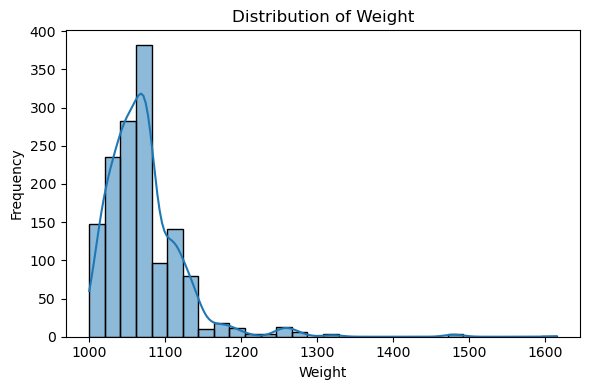

In [9]:
#exploring distributions, correlations, outliers
import matplotlib.pyplot as plt
import seaborn as sns
for col in data.columns:
    sns.histplot(data[col],bins=30,kde=True)
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


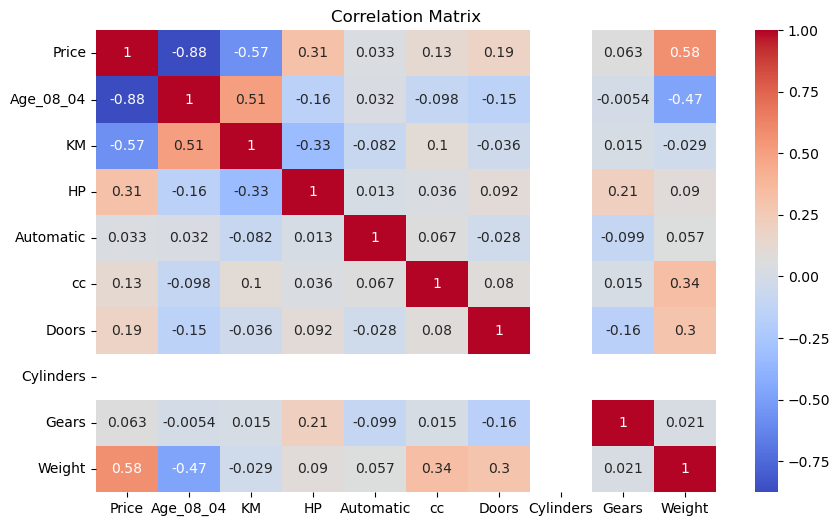

In [10]:
#Finding corelations
# Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

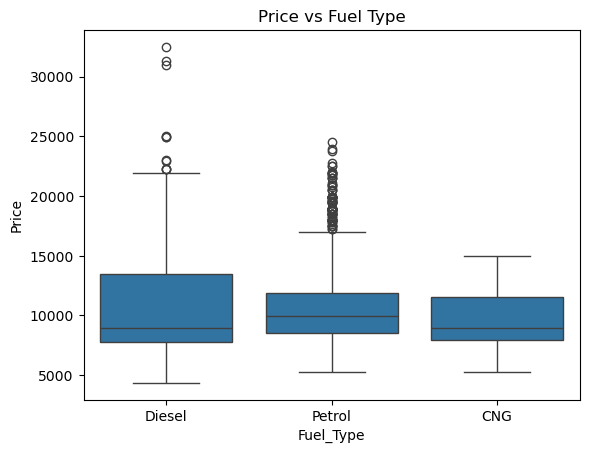

In [11]:
# Boxplot for Price vs FuelType
sns.boxplot(x='Fuel_Type', y='Price', data=data)
plt.title("Price vs Fuel Type")
plt.show()

In [12]:
# Diesel cars show higher price variation and high-end models.
# Petrol cars are the most commonly used
# CNG cars are budget-friendly no high-end models.

In [13]:
#identifying and encoding categorical data using ine hot encoding
data.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [14]:
#encoding the Fuel_type with one hot encoding
data=pd.get_dummies(data,columns=["Fuel_Type"],drop_first=True).astype(int)

In [15]:
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,1


In [16]:
#now our data is preprocessed and ready

# 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [23]:
from sklearn.model_selection import train_test_split

#Defining features (X) and target (y)
X = data.drop(['Price'], axis=1)#all the data except price
y = data['Price']#only price data

#Splitting the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Checking the shape of the split sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1148, 11)
X_test shape: (288, 11)
y_train shape: (1148,)
y_test shape: (288,)


# 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [25]:
from sklearn.linear_model import LinearRegression

# Model 1: Considering All the features
model1 = LinearRegression()
model1.fit(X_train, y_train)
print("Model 1 Coefficients (All features):")
print(pd.Series(model1.coef_, index=X_train.columns))
print("Intercept:", model1.intercept_)


Model 1 Coefficients (All features):
Age_08_04          -1.208305e+02
KM                 -1.623141e-02
HP                  1.403948e+01
Automatic           1.488309e+02
cc                 -3.037219e-02
Doors              -6.031097e+01
Cylinders          -2.984279e-13
Gears               5.516007e+02
Weight              2.588496e+01
Fuel_Type_Diesel   -6.854876e+01
Fuel_Type_Petrol    1.370809e+03
dtype: float64
Intercept: -14255.385993565265


In [26]:
# Model 2: Top 5 correlated features with Price
correlation = data.corr()
top_features = correlation['Price'].abs().sort_values(ascending=False)[1:6].index.tolist()
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

model2 = LinearRegression()
model2.fit(X_train_top, y_train)
print("\nModel 2 Coefficients (Top 5 correlated features):")
print(pd.Series(model2.coef_, index=X_train_top.columns))
print("Intercept:", model2.intercept_)


Model 2 Coefficients (Top 5 correlated features):
Age_08_04   -120.010417
Weight        19.880426
KM            -0.020242
HP            29.123289
Doors        -21.032162
dtype: float64
Intercept: -5346.924377899941


In [27]:
# Model 3: only considering Reduced features (excluding multicollinear or less impactful ones)
reduced_features = ['Age_08_04', 'KM', 'HP', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
X_train_reduced = X_train[reduced_features]
X_test_reduced = X_test[reduced_features]

model3 = LinearRegression()
model3.fit(X_train_reduced, y_train)
print("\nModel 3 Coefficients (Reduced set):")
print(pd.Series(model3.coef_, index=X_train_reduced.columns))
print("Intercept:", model3.intercept_)


Model 3 Coefficients (Reduced set):
Age_08_04           -120.665034
KM                    -0.016237
HP                    16.258363
Weight                25.257766
Fuel_Type_Diesel      54.190978
Fuel_Type_Petrol    1419.662714
dtype: float64
Intercept: -11382.197594058707


# 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"{name} Performance:")
    print("R² Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Evaluating Model 1 (All features)
evaluate_model("Model 1 ", model1, X_test, y_test)


Model 1  Performance:
R² Score: 0.8348888040611083
MAE: 990.8872739193923
MSE: 2203043.8231437015
RMSE: 1484.265415329651


In [29]:
# Evaluating Model 2 (Top 5 Correlated Features)
evaluate_model("Model 2 ", model2, X_test_top, y_test)

Model 2  Performance:
R² Score: 0.8508034710290995
MAE: 998.9280802795173
MSE: 1990697.7822719594
RMSE: 1410.9208986587305


In [30]:
# Evaluating Model 3 (Reduced Feature Set)
evaluate_model("Model 3 ", model3, X_test_reduced, y_test)

Model 3  Performance:
R² Score: 0.8339087377576148
MAE: 1001.2769680087102
MSE: 2216120.6408840436
RMSE: 1488.6640456745247


In [22]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# Scaling features (important for regularization methods)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression
lasso = Lasso(alpha=1.0)  # You can tune alpha
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # You can tune alpha
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluation Function
def evaluate_regularized_model(name, y_true, y_pred):
    print(f"\n {name} Results:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

# Evaluating both both
evaluate_regularized_model("Lasso Regression", y_test, y_pred_lasso)
evaluate_regularized_model("Ridge Regression", y_test, y_pred_ridge)


 Lasso Regression Results:
R² Score: 0.8351178206648817
MAE: 991.017466380573
MSE: 2199988.1029578503
RMSE: 1483.23568692162

 Ridge Regression Results:
R² Score: 0.8350462635431567
MAE: 990.8591771287421
MSE: 2200942.8745232914
RMSE: 1483.5575063081617


In [31]:
#Newer,less-driven,heavier,and higher-powered cars fetch higher prices.

# Interview Qyestions

In [34]:
#1.What is Normalization & Standardization and how is it helpful?

# Stabndardization and normalization are scaling techinques used to bring all the features to the same scale.
# standardizations scales allt the features to have a mean of 0 and std of 1
# eg:in this mlr assignment we have standardized all the features before applying lasso ridge regression so 
# the model wont bias towards features having larger values
    


In [ ]:
#2.What techniques can be used to address multicollinearity in multiple linear regression?
#Multicoolinearity occurs when there is a high corelation between two or more independent variables.

#to handle multicollinearity 
#we can apply ridge and lasso regression which is applied in this assigment
#ridge scales all the coefficents but does not remove them
#lasso automatically selects important features and drops the least important ones

